In [13]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)

<module 'johnny_deep.utils' from '/Users/marco/Desktop/johnny_deep/johnny_deep/utils.py'>

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import make_moons

In [16]:
X, Y = make_moons(n_samples=1000, noise=0.05, random_state=100)
X = X.transpose()

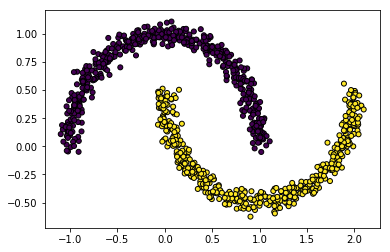

In [17]:
plt.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

In [18]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
    {"dimension": 4, "type": "sigmoid"},
    {"dimension": 6, "type": "sigmoid"},
    {"dimension": 6, "type": "sigmoid"},
    {"dimension": 4, "type": "sigmoid"},
    {"dimension": 1, "type": "sigmoid"},
]

In [19]:
m = johnny_deep.models.Model(nn_architecture)

In [20]:
m.model_info()

Layer 1: sigmoid with dimension 4
W shape: (4, 2)
b shape: (4, 1)
Layer 2: sigmoid with dimension 6
W shape: (6, 4)
b shape: (6, 1)
Layer 3: sigmoid with dimension 6
W shape: (6, 6)
b shape: (6, 1)
Layer 4: sigmoid with dimension 4
W shape: (4, 6)
b shape: (4, 1)
Layer 5: sigmoid with dimension 1
W shape: (1, 4)
b shape: (1, 1)


In [21]:
Y_hat = m.forward(X)

In [22]:
Y_hat.shape
Y.shape

(1000,)

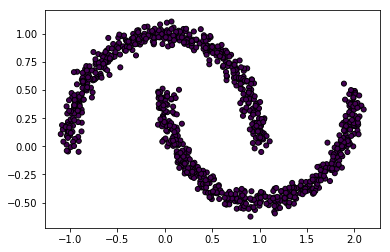

In [23]:
Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
plt.scatter(X[0, :], X[1, :], marker='o', c=Y_pred, s=25, edgecolor='k')

In [24]:
m.back_propagation(Y)
# Y_hat.shape


In [25]:
m.grads_values

{'dW5': array([[-0.01715212, -0.01833846, -0.01729824, -0.01955399, -0.01843676,
         -0.01907359]]),
 'db5': array([[-0.03732277]]),
 'dW4': array([[0.00031571, 0.0002946 , 0.00029472, 0.0003229 , 0.00031593,
         0.00033343],
        [0.00014699, 0.00013716, 0.00013722, 0.00015034, 0.00014709,
         0.00015524],
        [0.00017745, 0.00016559, 0.00016566, 0.0001815 , 0.00017758,
         0.00018742],
        [0.0006602 , 0.00061607, 0.00061632, 0.00067525, 0.00066066,
         0.00069726]]),
 'db4': array([[0.00065087],
        [0.00030303],
        [0.00036584],
        [0.00136107]]),
 'dW3': array([[ 9.13913157e-06,  6.46617147e-06,  7.33989648e-06,
          1.03694735e-05],
        [ 6.16940832e-06,  4.36532399e-06,  4.95499935e-06,
          6.99986250e-06],
        [ 1.22428952e-06,  8.66256832e-07,  9.83284545e-07,
          1.38909511e-06],
        [ 2.14593839e-05,  1.51838627e-05,  1.72350886e-05,
          2.43480766e-05],
        [-2.41138515e-06, -1.70622884